# 모델 훈련

#### 필요함수 import

In [3]:
# 한글 폰트 오류 해결 및 "-"기호 깨짐 방지
from matplotlib import font_manager, rc 
import matplotlib as mpl
font_path = "C:\\Users\\이혜림\\Desktop\\Bita5/malgun.ttf" #폰트 파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)
mpl.rcParams["axes.unicode_minus"]=False

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os

## 선형회귀
- 절편과 계수로 이루어진 선형식
- 이를 벡터꼴로 나타냄으로써 더 빠른 연산이 가능함
- 일반적으로 RMSE(MSE)의 손실함수를 최소화하는 것을 목표로 함.
- 비용함수를 최소화하는 최적의 파라미터를 찾는 방법 : 각 알고리즘의 결과는 차이가 없음
    - 해석적인 방법 : 속도는 빠르지만 메모리 공간을 굉장히 많이 차지
        - **정규방정식** 
            - 데이터 크기에 따른 속도 : O(n^2.4) ~ O(n^3)
    <img src=https://yganalyst.github.io/assets/images/ML/chap3/normal_equation.jpg width=400>
        - **유사역행렬** : 특이값 분해를 통해 유사역행렬을 찾아서 최적의 파라미터를 구함
            - 데이터 크기에 따른 속도 : O(n^2) : 데이터가 2배 늘어나면 속도는 4배로 증가
            - feature 수에 따른 속도 : O(m)
            - 효율적
            - 어떠한 경우에도 계산 가능
            - 사이킷런에서 사용하는 방식
            
    - GD(gradient descent) : 데이터가 굉장히 많아 메모리에 담을 수 없을 때 적합
        - 특성수에 민감하지 않음
        - 비용함수를 최소화하기 위해 반복적으로 파라미터를 조정해나감
        - 무작위 초기화
        - 학습률로 스텝의 크기 조정
            - 학습률이 너무 크면 발산
            - 학습률이 너무 작으면 너무 많은 시간이 소요(undersampling의 우려)
        - global minimum/local minimum
        - 특성 스케일링을 통해 수렴이 보다 빠르게 이루어질 수 있도록 해주어야 함
        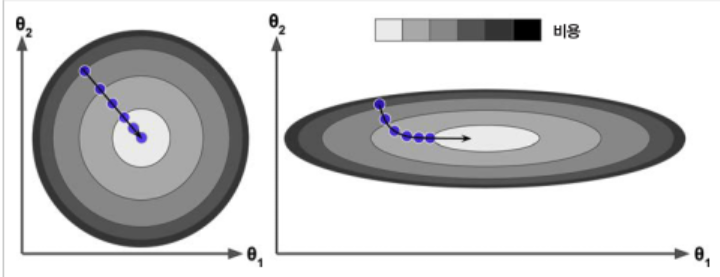
        - 그림에서의 파라미터1의 스케일이 작기 때문에 비용함수에 영향을 주기 위해선 더 많은 값을 움직여야 함
        - 배치 경사 하강법 : 매 경사 하강법 스탭에서 전체 훈련 세트 X에 대해 계산
            - 데이터가 커지면 속도가 느림
            - SGD에 비해선 아니지만 많은 메모리 필요
            - 지역 최솟값에 빠질 위험성 크지만 전역 최솟값에 정확하게 도달
        - 미니 배치 경사 하강법
            - 미니 배치에 대하여 그레디언트를 계산
            - 확률적 경사 하강법보다 지역 최솟값에 빠질 위험성은 크지만 덜 불안정
            - 미니 배치 : 임의의 작은 샘플 세트
        - 확률적 경사 하강법
            - 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산
            - 속도가 굉장히 빠르고 메모리 사용량 적기 때문에 매우 큰 훈련 세트 또한 훈련 가능
            - 확률적이기 때문에 배치 경사 하강법보다 훨씬 불안정
                 - 지역 최솟값을 건너뛸 수 있지만 전역 최솟값에도 도달하지 못할 수 있음
                 -
                 - 학습 스케줄 : 매 학습마다 learning rate를 결정
                     -  시작할 때는 학습률을 크게 하고(수렴을 빠르게, 지역 최솟값을 건너뛰게) 점점 작게 줄여서 알고리즘이 전역 최솟값에 도달할 수 있도록 함.

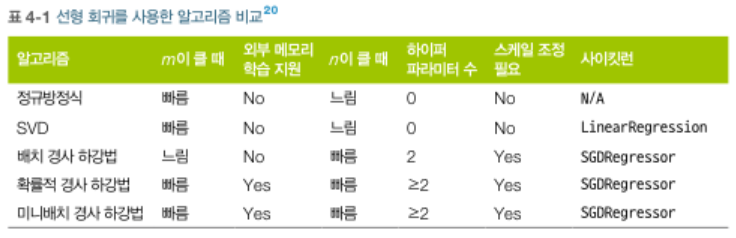

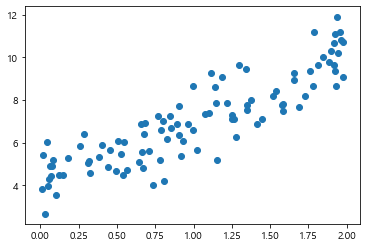

In [91]:
# 선형처럼 보이는 데이터셋 생성
X = 2 * np.random.rand(100,1) # 0~1 범위에서 해당 shape 만큼 random 숫자를 만들어줌
y = 4 + 3* X + np.random.randn(100,1) # 정규분포의 형태로 해당 shape 만큼 만들어줌

plt.scatter(x=X, y=y)

### 해석적인 방법을 통한 선형회귀

In [94]:
# 정규방정식을 이용하여 파라미터 추정
X_b = np.c_[np.ones((100,1)),X] # 절편 값을 위하여 모든 샘플에 X0=1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best # 정규방정식을 이용한 최적의 파라미터

array([[3.99006902],
       [2.9631087 ]])

In [12]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99006902],
       [9.91628642]])

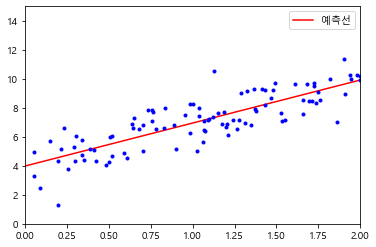

In [15]:
plt.plot(X_new, y_predict,"r-", label = "예측선")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

In [21]:
# 사이킷런을 이용한 선형회귀
from sklearn.linear_model import LinearRegression # 유사역행렬을 이용
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_) # 사이킷런을 이용한 y절편과 X의 계수
lin_reg.predict(X_new)

[3.99006902] [[2.9631087]]


array([[3.99006902],
       [9.91628642]])

### gradient descent를 이용한 선형회귀 

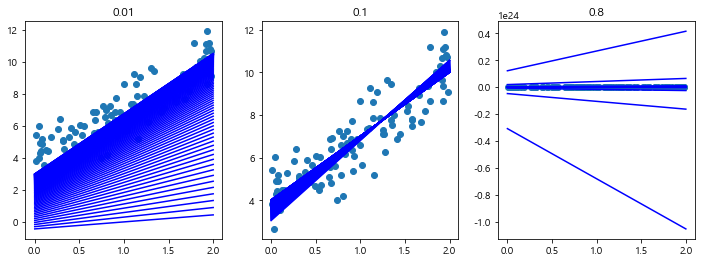

In [95]:
# 배치 경사 하강법
etzs = [0.01,0.1,0.8] # 학습률
n_iterations = 100 # 반복횟수
m = 100

theta = np.random.randn(2,1)
plt.figure(figsize=(12,4))
for idx, etz in enumerate(etzs):
    plt.subplot(1,3,idx+1)
    plt.scatter(X,y)
    for iteration in range(n_iterations):
        gradients = X_b.T.dot(X_b.dot(theta)-y)*2/m
        theta = theta - etz * gradients

        X_test = np.array([[0],[2]])
        X_test_b = np.c_[np.ones((2,1)),X_test]
        predicted = np.dot(X_test_b, theta)

        plt.plot(X_test, predicted, "b-")
    plt.title(etz)

In [99]:
X_test_b

array([[1., 0.],
       [1., 2.]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


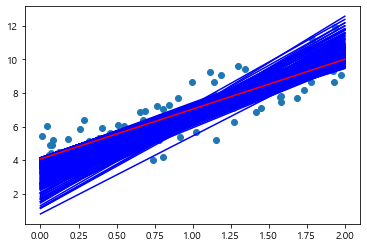

In [102]:
n_epochs = 50 # 전체 데이터를 총 몇번 돌릴지를 결정
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # 무작위 초기화
plt.scatter(X,y)

for epoch in range(n_epochs):
    for i in range(m):
        
        random_index = np.random.randint(m) # index를 무작위로 선택
        xi = X_b[random_index:random_index+1] # shape를 유지해주기 위해서 이렇게 선택
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i) # 점점 learning rate가 줄어듦
        theta = theta - eta * gradients
        
        predicted = np.dot(X_test_b, theta)

        plt.plot(X_test, predicted, "b-")

# 아예 랜덤으로 선택을 하기 때문에 한 에포크에서 하나의 데이터가 여러번 선택될 수 있음
# sklearn SGD 는 전체 데이터를 한번 무작위로 섞은 후에 차례대로 꺼내옴 -> 또 섞음
# 그러나 이렇게 하면 보통 더 늦게 수렴됨

# 사이킷런의 SGD를 통한 회귀분석
from sklearn.linear_model import SGDRegressor
# 1000번 반복, cost가 0.001보다 적게 줄어들면 멈춤, penaly로는 랏소, 릿지 같은 것들이 해당됨
# learning rate = 0.1
sgd_reg = SGDRegressor(max_iter = 1000, tol=1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X, y)
predicted = sgd_reg.predict(X_test)
plt.plot(X_test, predicted, "r-")


In [87]:
theta

array([[3.23511454],
       [0.58202756]])

### 다항회귀
- 각 특성의 거듭제곱을 새로운 특성으로 추가한 선형모델
- 비선형 데이터를 학습하는데에 사용할 수 있음

In [137]:
m = 100
X = 6 * np.random.rand(m,1)-3 # -3~3까지로 범위를 설정
y = 0.5*X**2+X+2+np.random.randn(m,1) # 오류텀을 추가

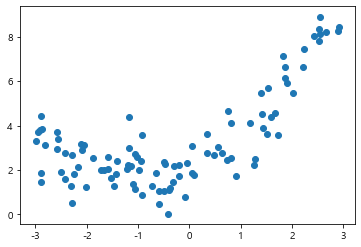

In [138]:
plt.scatter(X,y)

In [139]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# include_bias = True가 디폴트 값.
# sklearn의 linearregression은 데이터에 bias term이 없어도 bias term 을 추가해서
# 모델을 반환하기 때문에 include_bias=False로 설정
# 특성이 여러개라면 주어진 차수까지 특성 간의 모든 교차항을 추가해서 만들어줌
X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[-1.05609528] [-1.05609528  1.11533724]


In [140]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.16294167] [[0.97249343 0.47548677]]


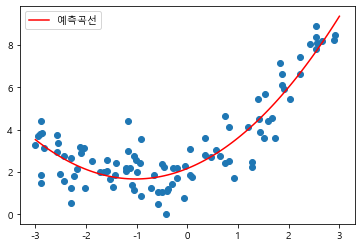

In [141]:
plt.scatter(X, y)
X_new = np.linspace(-3,3,100).reshape(100,1) # -3에서 3까지 100개의 랜덤 실수
X_new_poly = poly_features.fit_transform(X_new)
predicted = lin_reg.predict(X_new_poly)
plt.plot(X_new,predicted, "r-",label = "예측곡선")
# 실제 값은 X_new_poly가 아닌 X_new 이기 때문에 X_new로 해주어야 함
plt.legend()
plt.show()

## Overfitting vs Underfitting

- underfitting : 훈련세트와 검증세트의 오차가 크고 비슷, 충분한 epoch를 하였음에도 underfitting이 되는 경우에는 이미 train set이 일반화가 된 상황이기 때문에 데이터를 추가해도 도움이 안됨. 모델을 더 복잡/feature 추가
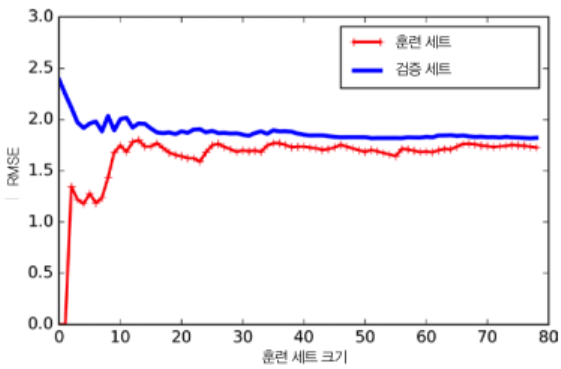

- overfitting : 훈련세트의 오차가 검증세트의 오차보다 큼. 이 때 data를 추가해줌으로써 train set의 size를 키움 -> 보다 더 일반화된 모델을 생성할 수 있음
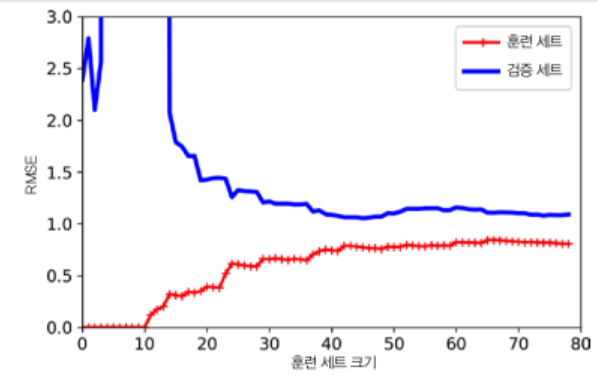

In [150]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [151]:
def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # 점점 사용하는 데이터 개수를 늘려나감
        y_val_predict = model.predict(X_val[:m])
        y_train_predict = model.predict(X_train[:m])
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", label = "훈련세트")
    plt.plot(np.sqrt(val_errors), "b+", label =" 검증세트")
    plt.legend()
    plt.show()

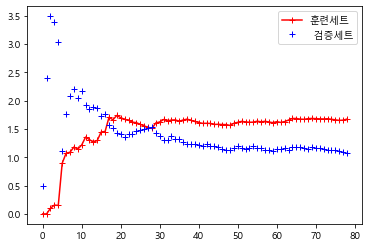

In [154]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

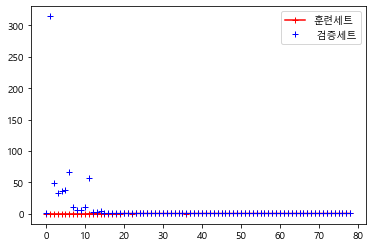

In [156]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

## 오차
- 편향에 대한 오차 : 한 모델에서 실제값과 예측값에서 발생하는 오차
    - underfitting
- 분산에 대한 오차 : 한 모델을 가지고 여러 데이터에 대해서 오차를 쟀을 때 발생하는 오차
    - overfitting
- 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생하는 오차
    - 이 오차를 줄일 수 있는 유일한 방법 : 데이터에서 잡음을 제거하는 것
- 편향과 분산은 trade-off 관계에 있음

## 규제가 있는 선형 모델

- overfitting 을 방지하기 위한 회귀 모델들
    - **릿지 회귀(l2)** : 너무 큰 계수에 민감하게 반응함으로써 계수를 평평하게 맞춰줌
        - 제곱이기 때문에 계수를 0에 가까운 수로는 만들지만 0으로 만들지는 않음
        - 제곱이기 때문에 작아질수록 gradient가 더 작아짐 -> 진동이 없고 수렴에 도움이 됨.
    - **라소 회귀(l1)** : 희소행렬을 향하여 모델이 이동함
        - 큰 계수이던 작은 계수이던 같은 기울기의 값으로 작아짐
        - 계수를 0으로 만ㄷ름으로써 희소모델을 만듦
        - 필요없는 feature가 많은 경우 라소 회귀가 적당
        - 작아져도 gradient가 작아지기 않기 때문에 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함
        - 서브 그레디언트 벡터를 이용하여 경사하강법 사용
            - 서브 그레디언트 : 미분 불가능한 지점 근방 그레디언트들의 중간값
        - 특성 수가 샘플 수(n)보다 많으면 최대 n개의 특성을 선택, 여러 특성이 강하게 연관되어 있으면 임의의 특성 하나를 선택
    - **엘라스틴 회귀** : 릿지 회귀와 라소회귀 모두를 사용함
        - 릿지 회귀와 라쏘 회귀를 절충한 모델
        - 혼합 비율 r을 이용하여 혼합 정도 정함(0:릿지회귀, 1:라쏘회귀)

In [146]:
from sklearn.linear_model import Ridge
# gradient 방식을 사용할 수도, 정규방정식과 같은 방법을 사용할 수 도 있음
# 여기서는 정규방정식과 같은 방식을 사용하였음
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y.ravel())
print(ridge_reg.predict([[1.5]]))
# 확률적 경사 하강법에서의 l2 규제
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X,y.ravel()) # data.ravel()은 데이터를 쫙 펴줌
print(sgd_reg.predict([[1.5]]))

[4.76425769]
[4.74403471]


In [147]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y.ravel())
predicted = lasso_reg.predict([[1.5]])

## 조기 종료
- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시킴
- 더 진행되면 overfitting의 발생 우려
- 배치 경사하강법은 괜찮지만 확률적 경사하강법 혹은 미니 배치 경사하강법은 곡선이 매끄럽지 않아서 최솟값에 도달했는지 확인이 어려움
    - 검증 에러가 일정 시간 동안 최솟값보다 클 때(모델이 더 나아지지 않는다는 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌림

In [195]:
# 조기 종료를 위한 기본 구현 코드
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                      ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

# iteration을 1번한 sgd함수를 생성한 후에 직접 for문으로 sgd 실시
# warm_start = True를 통해 훈련을 이어서 진행할 수 있도록 설정
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate = "constant", eta0=0.0005)

minimum_var_error = float("inf")
best_epoch = None
best_model = None
epoch = 0
for i in range(1000):
    epoch +=1
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    var_error = mean_squared_error(y_val.ravel(), y_val_predict)
    if var_error < minimum_var_error:
        minimum_var_error = var_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [198]:
# clone은 데이터 없이 모델만 복사하는 것이기 때문에 다시 학습시켜 주어야 함
for i in range(best_epoch):
    best_model.fit(X_train_poly_scaled, y_train.ravel())

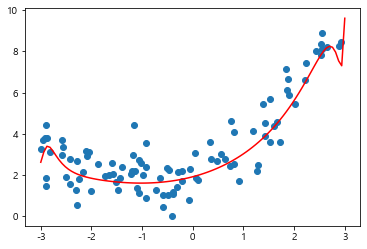

In [207]:
plt.scatter(X,y)
X_poly_scaler = poly_scaler.fit_transform(np.linspace(-3,3,100).reshape(100,1))
predicted = best_model.predict(X_poly_scaler)
plt.plot(np.linspace(-3,3,100), predicted, "r-")

## 로지스틱 회귀
- 샘플이 특정 클래스에 속할 확률을 추정
- 선형 회귀에서의 y를 로짓으로 바꾼 함수
- 시그모이드 함수를 사용


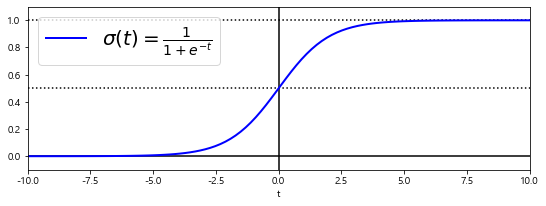

In [209]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [210]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [211]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [ ]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

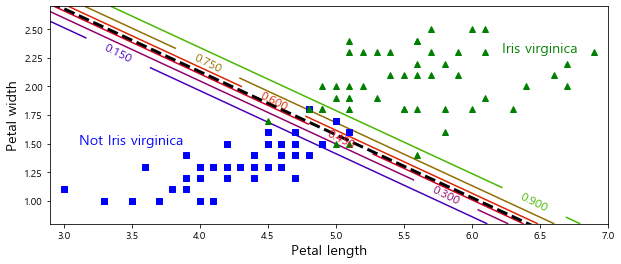

In [217]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()